In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
# filter warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman03-22.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman02-05.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-24.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman05-26.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman04-00.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman02-00.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-21.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman04-18.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman05-01.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-12.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-03.png
/kaggle/in

In [14]:
import os
#train_file_path="/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/train/"
#validation_file_path="/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/"
train_file_path="/kaggle/input/horses-or-humans-dataset/horse-or-human/train/"
validation_file_path="/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/"
train_dataset=[]
validation_dataset=[]
for i in os.listdir(train_file_path):
    train_dataset+=[train_file_path+i+"/"+j for j in os.listdir(train_file_path+i)]
    validation_dataset+=[validation_file_path+i+"/"+j for j in os.listdir(validation_file_path+i)]
#train_dataset_new=[train_file_path+i+"/"+j for i in os.listdir(train_file_path) for j in os.listdir(train_file_path+i) ]

In [15]:
#train_dataset=train_dataset[9601:10401]
#validation_dataset=validation_dataset[2401:2601]
train_dataset=train_dataset[:1000]

In [16]:
import cv2
def fotoToArray(dataset):
    yukseklik=64
    genislik=64
    array_foto=[0 for i in range(len(dataset))]
    a=0
    for i in dataset:
        foto=cv2.imread(i,0)
        foto=cv2.resize(foto,(genislik,yukseklik))
        array_foto[a]=foto
        a+=1
    array_foto=np.array(array_foto)
    return array_foto
train_resimler=fotoToArray(train_dataset)
validation_resimler=fotoToArray(validation_dataset)

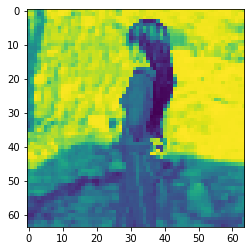

In [17]:
import matplotlib.pyplot as plt
plt.imshow(train_resimler[400])

In [18]:
train_resimler.shape

(1000, 64, 64)

In [19]:
def etiket_hazirlama(X):
    z = np.zeros(int(X.shape[0]/2),dtype=np.float32)
    o = np.ones(int(X.shape[0]/2),dtype=np.float32)
    Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
    return Y

train_etiket=etiket_hazirlama(train_resimler)
validation_etiket=etiket_hazirlama(validation_resimler)

In [20]:
def formata_dondurme(deger):
    deger_liste=[]
    for i in range(deger.shape[0]):
        deger_liste.append(deger[i])
    deger_resimler=np.array(deger_liste,dtype=np.float32)
    return deger_resimler

train_resimler=formata_dondurme(train_resimler)
validation_resimler=formata_dondurme(validation_resimler)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_resimler, train_etiket, test_size=0.15, random_state=42)


In [22]:
def photo_scaling(dataset):
    for i in range(dataset.shape[0]):
        for j in range(dataset[i].shape[0]):
            for k in range(dataset[i].shape[1]):
                dataset[i][j,k]=dataset[i][j,k]/255
    return dataset
X_train=photo_scaling(X_train)
X_test=photo_scaling(X_test)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [23]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (850, 4096)
X test flatten (150, 4096)


In [24]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 850)
x test:  (4096, 150)
y train:  (1, 850)
y test:  (1, 150)


In [25]:
import numpy as np
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.001)
    b=0.0
    return w,b

weight, bias =initialize_weights_and_bias(10)
print(f"bias=>{bias} \n weight \n {weight}")

bias=>0.0 
 weight 
 [[0.001]
 [0.001]
 [0.001]
 [0.001]
 [0.001]
 [0.001]
 [0.001]
 [0.001]
 [0.001]
 [0.001]]


In [26]:
def sigmoid(z):
    y_head= 1/(1+np.exp(-z))
    return y_head

sigmoid(np.array([1,2,3,4,5,566]))

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715,
       1.        ])

In [27]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [28]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


In [29]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 1.290725
Cost after iteration 100: 0.633524
Cost after iteration 200: 0.599332
Cost after iteration 300: 0.575193
Cost after iteration 400: 0.556854
Cost after iteration 500: 0.542185
Cost after iteration 600: 0.529993
Cost after iteration 700: 0.519556
Cost after iteration 800: 0.510419
Cost after iteration 900: 0.502275
Cost after iteration 1000: 0.494916
Cost after iteration 1100: 0.488191
Cost after iteration 1200: 0.481992
Cost after iteration 1300: 0.476235
Cost after iteration 1400: 0.470856
Cost after iteration 1500: 0.465807
Cost after iteration 1600: 0.461045
Cost after iteration 1700: 0.456539
Cost after iteration 1800: 0.452261
Cost after iteration 1900: 0.448189
Cost after iteration 2000: 0.444303
Cost after iteration 2100: 0.440586
Cost after iteration 2200: 0.437025
Cost after iteration 2300: 0.433607
Cost after iteration 2400: 0.430320
Cost after iteration 2500: 0.427155
Cost after iteration 2600: 0.424103
Cost after iteration 2700: 0.421156
Cost

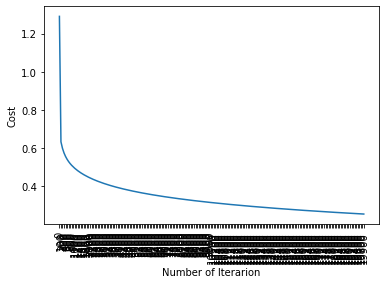

train accuracy: 92.70588235294117 %
test accuracy: 82.0 %


In [32]:
import matplotlib.pyplot as plt
import sys
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.001, num_iterations = 20000)

In [31]:
#Logistic Regression with Sklearn
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
print(f"test accuracy: {lr.fit(x_train.T,y_train.T).score(x_test.T,y_test.T)}")


test accuracy: 0.86
train accuracy: 1.0
